In [4]:
#Imports
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os 

In [5]:
#Data Download directory

dir="data/"

In [6]:
#Frames
df_stops=pd.read_csv(dir+"/pit_stops.csv")
df_constructor_standing=pd.read_csv(dir+"/constructor_standings.csv")
df_races=pd.read_csv(dir+"/races.csv")

In [7]:
#Merge Frames

commmon_columns_CS_PT=["raceId"]
commmon_columns_CS_PT_RC=["raceId"]

merged_CS_PT=pd.merge(df_stops,df_constructor_standing,on=commmon_columns_CS_PT,how="outer")
merged_CS_PT_RC=pd.merge(merged_CS_PT,df_races,on=commmon_columns_CS_PT_RC,how="outer")

In [8]:
print(merged_CS_PT_RC.describe())

              raceId       driverId           stop            lap  \
count  127112.000000  116628.000000  116628.000000  116628.000000   
mean      924.101194     532.056590       1.799705      25.332390   
std       186.907666     388.151594       1.510880      14.841635   
min         1.000000       1.000000       1.000000       1.000000   
25%       873.000000      18.000000       1.000000      13.000000   
50%       950.000000     816.000000       2.000000      25.000000   
75%      1041.000000     832.000000       2.000000      36.000000   
max      1144.000000     860.000000      70.000000      78.000000   

       milliseconds  constructorStandingsId  constructorId         points  \
count  1.166280e+05           127036.000000  127036.000000  127036.000000   
mean   8.283363e+04            25569.222339      69.295782      92.455713   
std    3.049661e+05             4308.546747      84.177822     136.009386   
min    1.289700e+04                1.000000       1.000000       0.000

In [9]:
#Data cleaning


# nan_count = merged_CS_PT_RC.isna().sum()
# print(nan_count)

# rows_with_nan = merged_CS_PT_RC[merged_CS_PT_RC.isna().any(axis=1)]
# print(rows_with_nan)

df_cleaned=merged_CS_PT_RC.drop(columns=["round","date","time_y","url","fp1_date","fp1_time","fp3_time","quali_date","fp2_date","fp2_time","fp3_date","quali_time","sprint_date","sprint_time"])
# nan_count = merged_CS_PT_RC.isna().sum()
# print(nan_count)


# Assuming df is your DataFrame

# Print all rows containing NaN values
df_cleaned.dropna(inplace=True)
df_sampled=df_cleaned.sample(n=1000,random_state=42)

# print(df_cleaned.describe())
print(df_cleaned.describe())
print(df_cleaned.shape)

              raceId       driverId           stop            lap  \
count  116628.000000  116628.000000  116628.000000  116628.000000   
mean      970.411754     532.056590       1.799705      25.332390   
std        89.497698     388.151594       1.510880      14.841635   
min       841.000000       1.000000       1.000000       1.000000   
25%       887.000000      18.000000       1.000000      13.000000   
50%       960.000000     816.000000       2.000000      25.000000   
75%      1052.000000     832.000000       2.000000      36.000000   
max      1132.000000     860.000000      70.000000      78.000000   

       milliseconds  constructorStandingsId  constructorId         points  \
count  1.166280e+05           116628.000000  116628.000000  116628.000000   
mean   8.283363e+04            26588.007408      71.625339      99.149823   
std    3.049661e+05             1331.130241      86.192215     139.625558   
min    1.289700e+04            24540.000000       1.000000       0.000

Visuilazing data

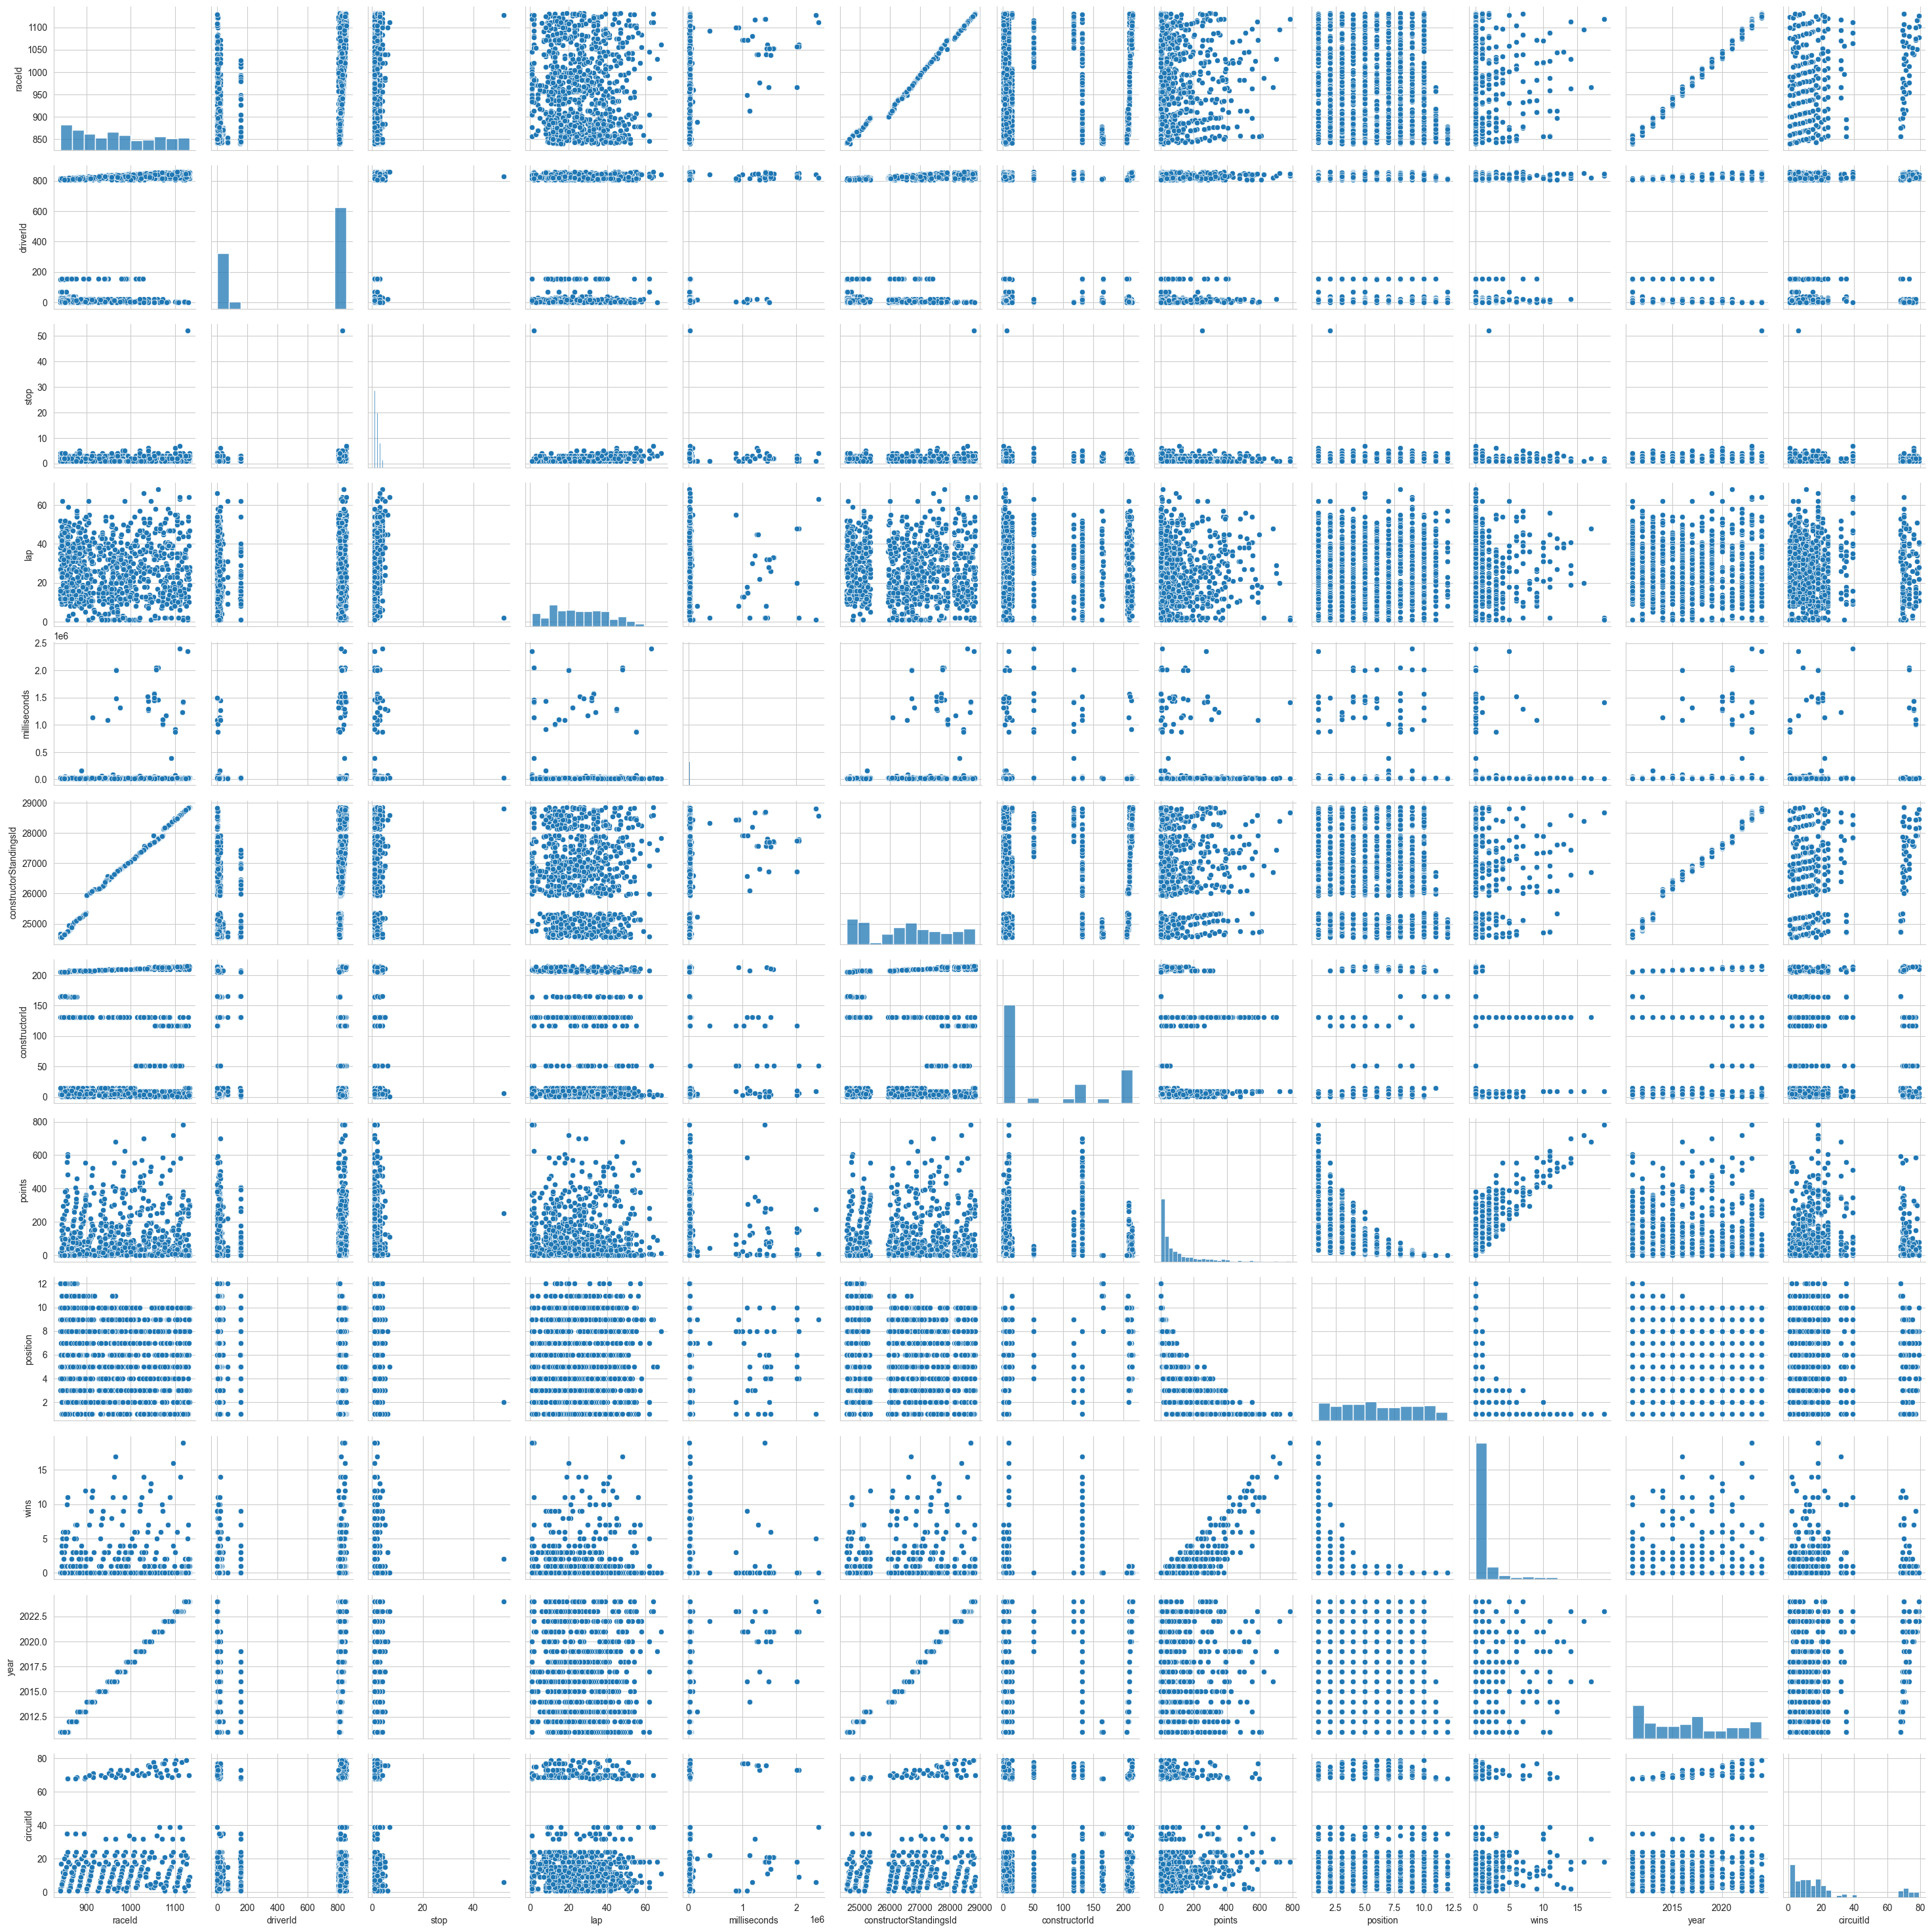

In [12]:
sns.pairplot(df_sampled);

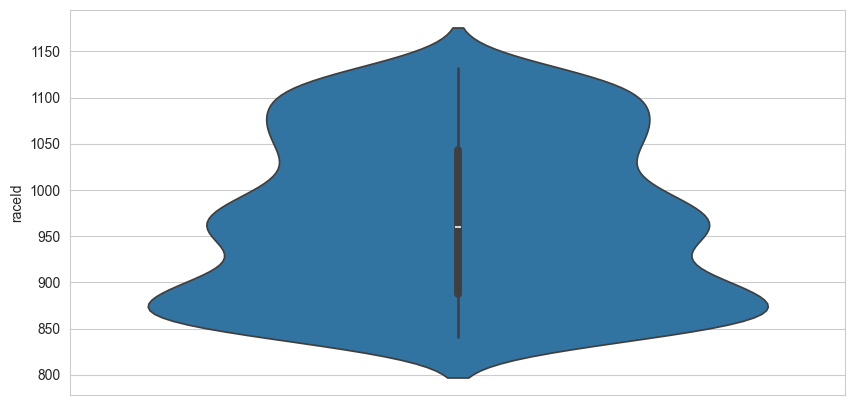

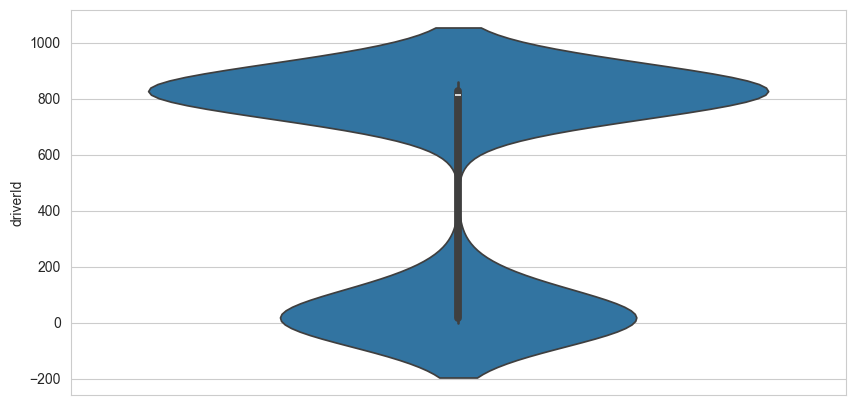

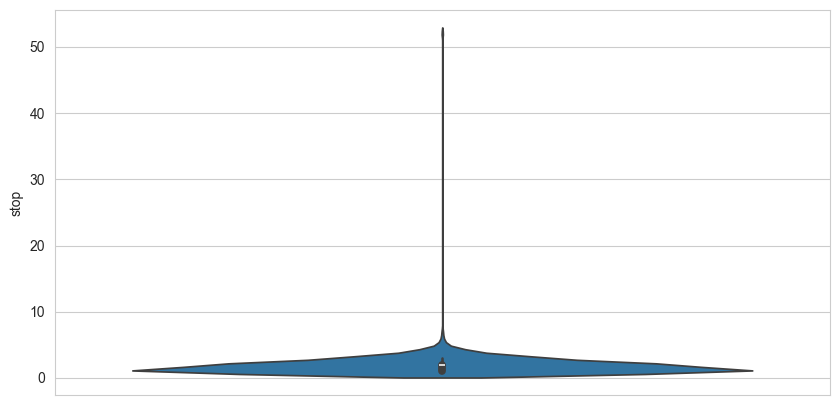

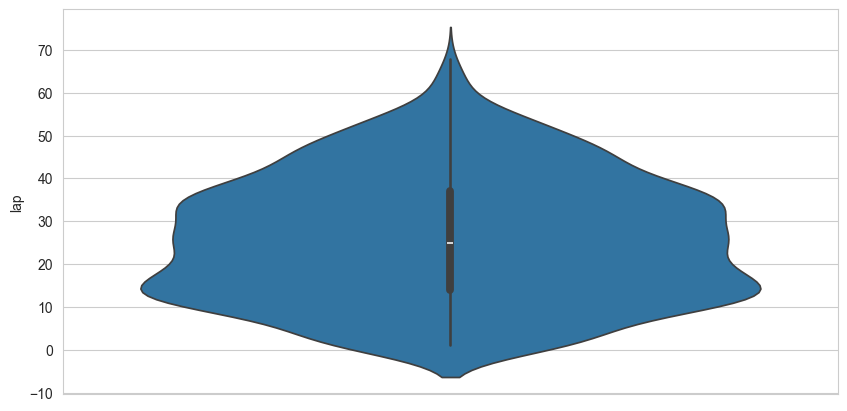

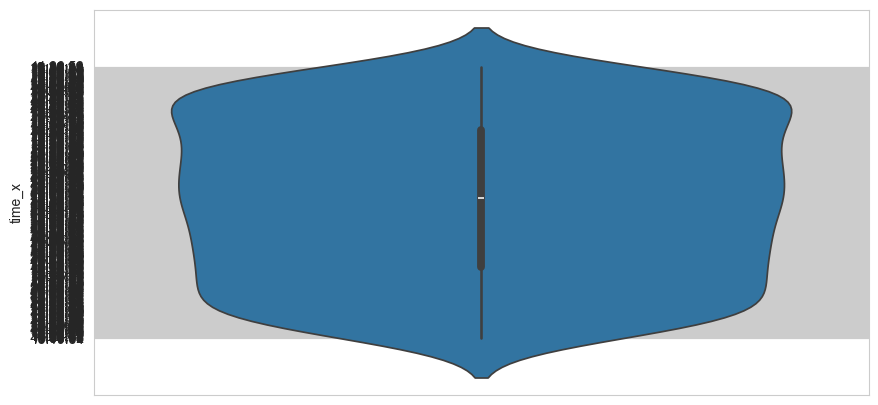

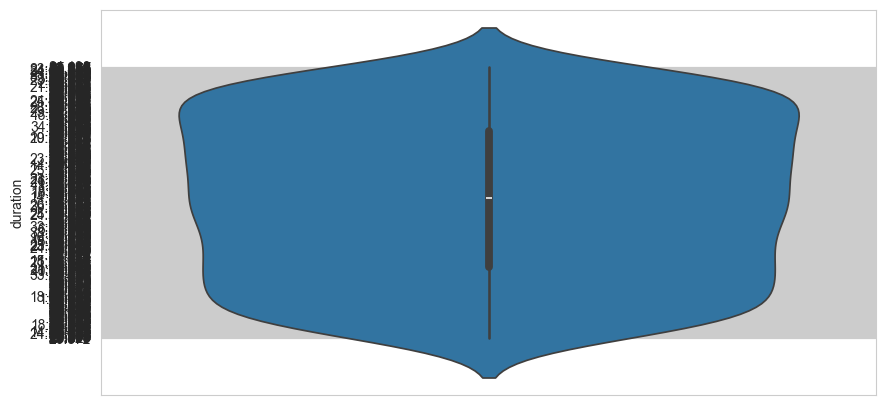

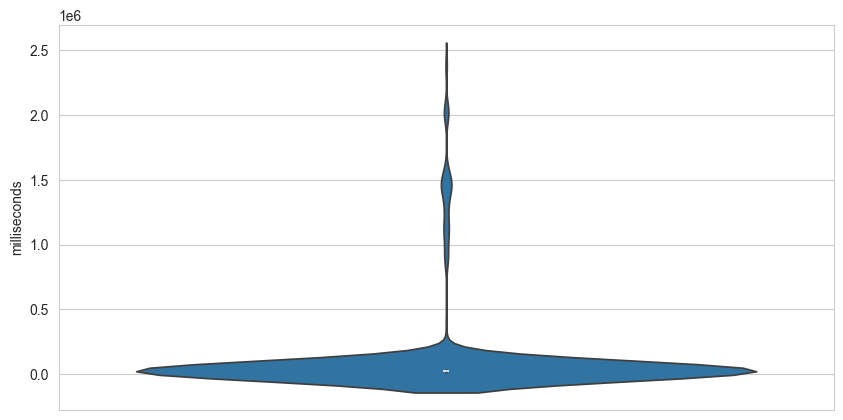

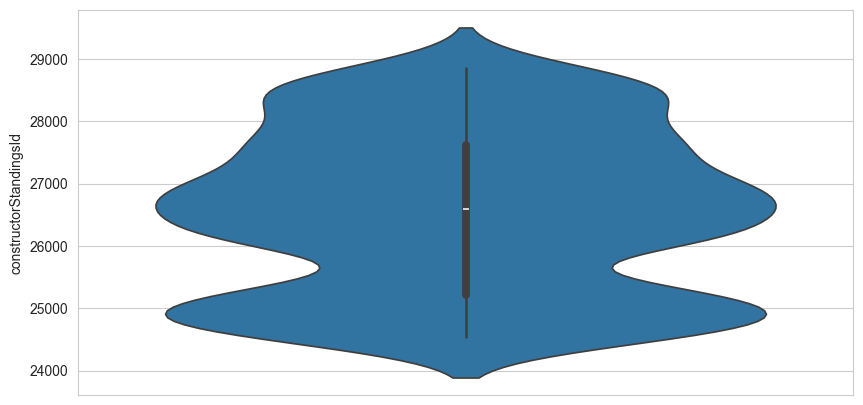

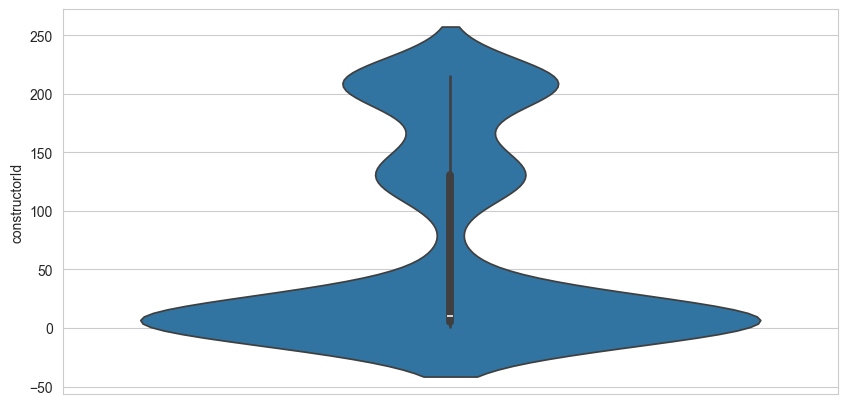

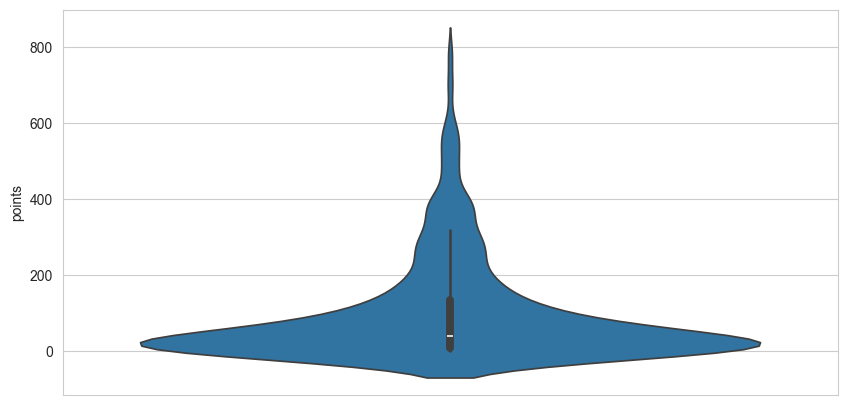

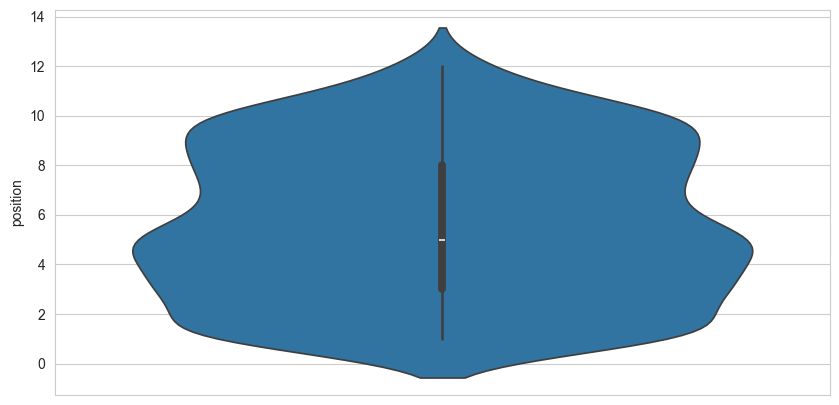

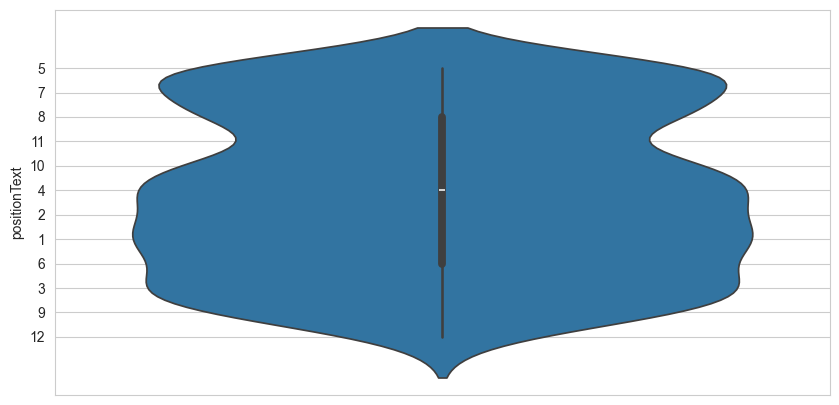

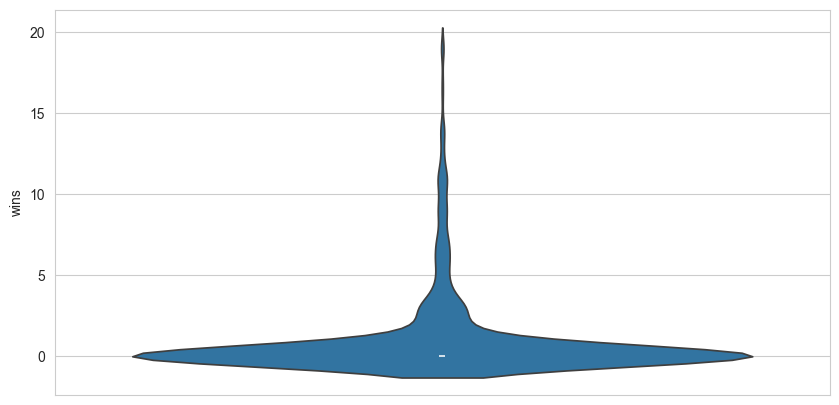

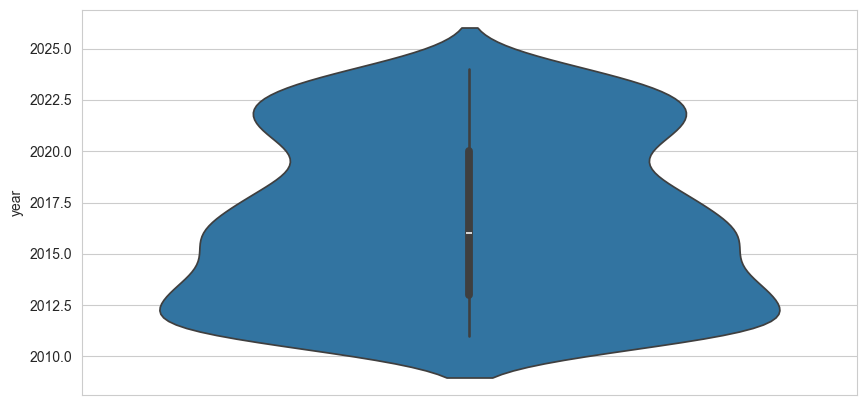

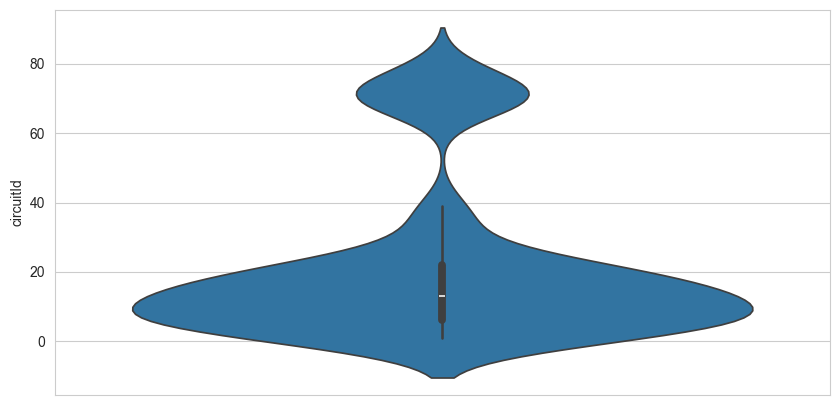

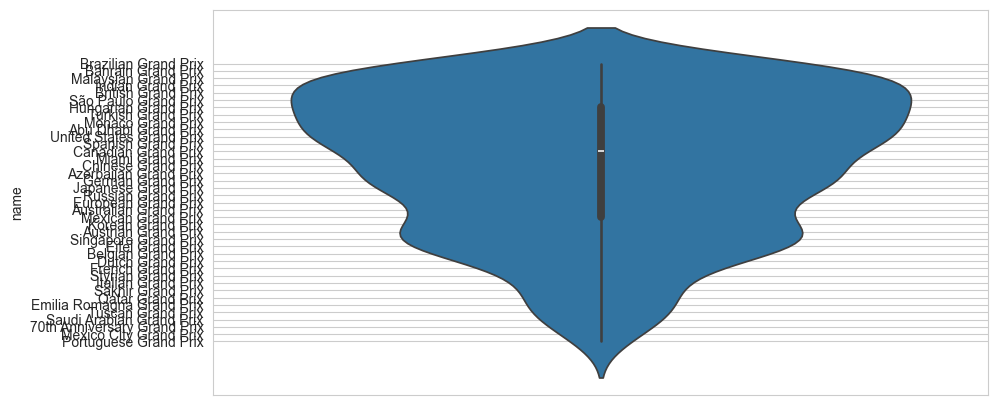

In [11]:
for i in df_cleaned:
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df_sampled,y=i)